# GER40 Processed Data Analysis
Analysis of processed 1-minute GER40 market data to verify quality, patterns, and statistics

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

## Load Processed Data

In [15]:
df = pd.read_csv('../processed-data/GER40-M1-20230103-20251110-processed.csv')
df['Time'] = pd.to_datetime(df['Date'] + ' ' + df['TOD'])
df = df.sort_values('Time').reset_index(drop=True)
print(f"Total records: {len(df):,}")
print(f"Date range: {df['Time'].min()} to {df['Time'].max()}")
df.head()

Total records: 9,960
Date range: 2023-01-03 00:15:00 to 2023-01-12 20:59:00


,Date,TOD,OpenBid,OpenAsk,HighBid,HighAsk,LowBid,LowAsk,CloseBid,CloseAsk,Time
0,2023-01-03,00:15,13976.6,13979.1,13976.6,13979.1,13931.6,13939.1,13949.6,13956.1,2023-01-03 00:15:00
1,2023-01-03,00:16,13949.6,13957.1,13954.6,13960.1,13944.6,13946.1,13948.6,13952.1,2023-01-03 00:16:00
2,2023-01-03,00:17,13949.6,13952.1,13959.6,13961.1,13946.6,13952.1,13959.6,13961.1,2023-01-03 00:17:00
3,2023-01-03,00:18,13959.6,13963.1,13961.6,13963.1,13955.6,13958.1,13955.6,13958.1,2023-01-03 00:18:00
4,2023-01-03,00:19,13955.6,13957.1,13959.6,13964.1,13948.6,13952.1,13958.6,13962.1,2023-01-03 00:19:00


## Basic Statistics

In [16]:
print("Data shape:", df.shape)
print("\nColumn types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print("\nPrice statistics (CloseBid):")
print(df['CloseBid'].describe())

Data shape: (9960, 11)

Column types:
Date                object
TOD                 object
OpenBid            float64
OpenAsk            float64
HighBid            float64
HighAsk            float64
LowBid             float64
LowAsk             float64
CloseBid           float64
CloseAsk           float64
Time        datetime64[ns]
dtype: object

Missing values:
Date        0
TOD         0
OpenBid     0
OpenAsk     0
HighBid     0
HighAsk     0
LowBid      0
LowAsk      0
CloseBid    0
CloseAsk    0
Time        0
dtype: int64

Price statistics (CloseBid):
count     9960.000000
mean     14604.825776
std        286.304587
min      13905.600000
25%      14437.435000
50%      14646.120000
75%      14819.360000
max      15123.750000
Name: CloseBid, dtype: float64


## Time Gap Analysis

In [17]:
df['time_diff'] = df['Time'].diff()
print("Time differences between consecutive records:")
print(df['time_diff'].value_counts().head(20))
print(f"\nExpected 1-minute intervals: {(df['time_diff'] == timedelta(minutes=1)).sum():,}")
print(f"Gaps > 1 minute: {(df['time_diff'] > timedelta(minutes=1)).sum():,}")

Time differences between consecutive records:
time_diff
0 days 00:01:00    9952
0 days 03:16:00       6
2 days 03:16:00       1
Name: count, dtype: int64

Expected 1-minute intervals: 9,952
Gaps > 1 minute: 7


## Missing Data Periods

In [18]:
gaps = df[df['time_diff'] > timedelta(minutes=1)].copy()
gaps['gap_minutes'] = gaps['time_diff'].dt.total_seconds() / 60
print(f"Total gaps: {len(gaps)}")
if len(gaps) > 0:
    print("\nLargest gaps:")
    print(gaps[['Time', 'gap_minutes']].sort_values('gap_minutes', ascending=False).head(20))
else:
    print("\nNo gaps detected - data is continuous!")

Total gaps: 7

Largest gaps:
                    Time  gap_minutes
4980 2023-01-09 00:15:00       3076.0
2490 2023-01-05 00:15:00        196.0
1245 2023-01-04 00:15:00        196.0
3735 2023-01-06 00:15:00        196.0
6225 2023-01-10 00:15:00        196.0
7470 2023-01-11 00:15:00        196.0
8715 2023-01-12 00:15:00        196.0


## Daily Trading Schedule Analysis

In [19]:
df['date'] = df['Time'].dt.date
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df['day_of_week'] = df['Time'].dt.day_name()
daily_counts = df.groupby('date').size()
print("Records per day statistics:")
print(daily_counts.describe())
print("\nRecords per day:")
print(daily_counts)

Records per day statistics:
count       8.0
mean     1245.0
std         0.0
min      1245.0
25%      1245.0
50%      1245.0
75%      1245.0
max      1245.0
dtype: float64

Records per day:
date
2023-01-03    1245
2023-01-04    1245
2023-01-05    1245
2023-01-06    1245
2023-01-09    1245
2023-01-10    1245
2023-01-11    1245
2023-01-12    1245
dtype: int64


## Day of Week Analysis

Records by day of week:
day_of_week
Tuesday      2490
Wednesday    2490
Thursday     2490
Friday       1245
Monday       1245
Name: count, dtype: int64


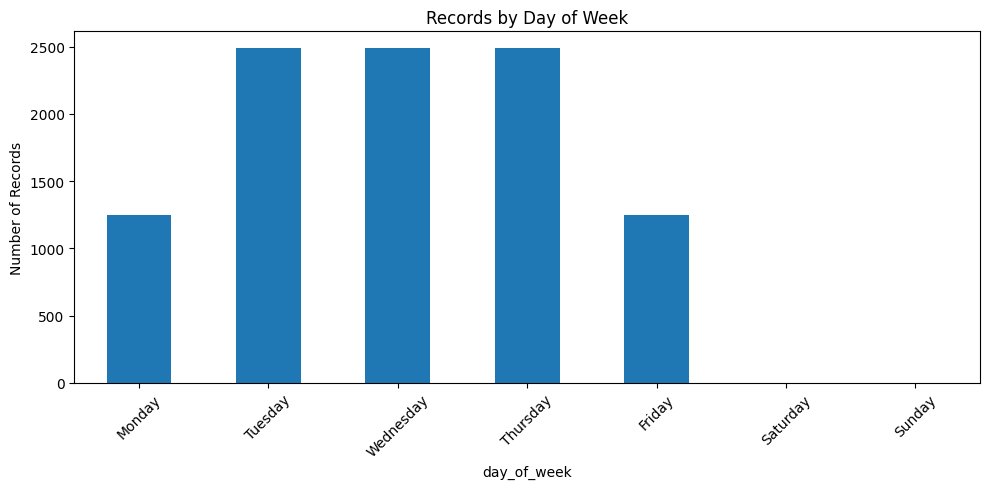

In [20]:
dow_counts = df['day_of_week'].value_counts()
print("Records by day of week:")
print(dow_counts)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = dow_counts.reindex(days_order)
dow_counts.plot(kind='bar', title='Records by Day of Week', figsize=(10, 5))
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Hourly Trading Patterns

Records by hour of day:
hour
0     360
1     480
2     480
3     480
4     480
5     480
6     480
7     480
8     480
9     480
10    480
11    480
12    480
13    480
14    480
15    480
16    480
17    480
18    480
19    480
20    480
Name: count, dtype: int64


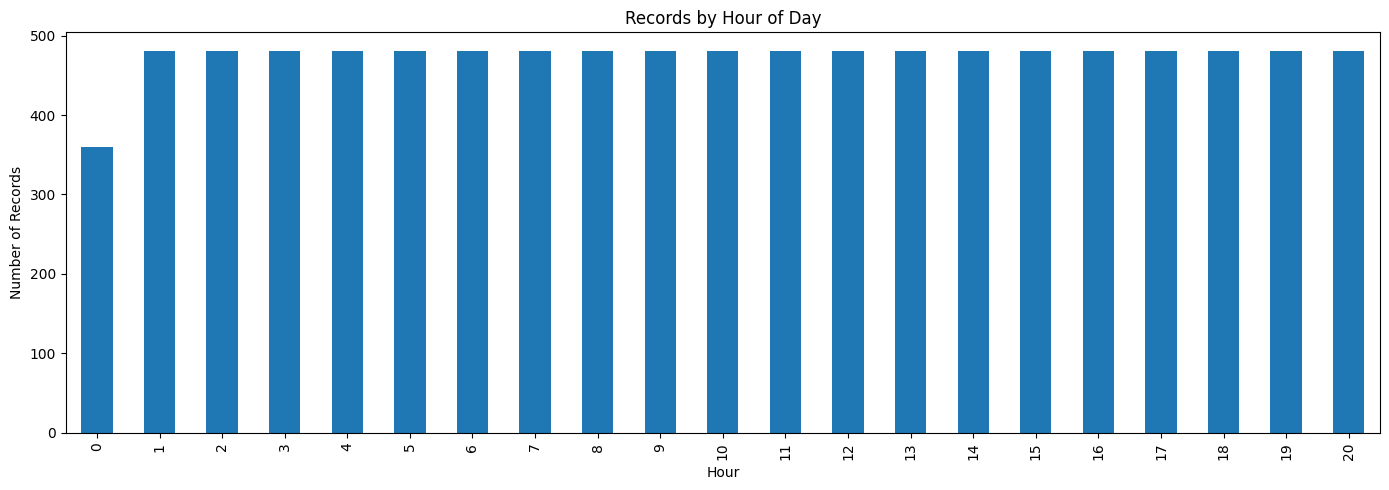

In [21]:
hourly_counts = df['hour'].value_counts().sort_index()
print("Records by hour of day:")
print(hourly_counts)
hourly_counts.plot(kind='bar', title='Records by Hour of Day', figsize=(14, 5))
plt.xlabel('Hour')
plt.ylabel('Number of Records')
plt.tight_layout()
plt.show()

## First and Last Trading Times Each Day

In [22]:
daily_schedule = df.groupby('date')['Time'].agg(['min', 'max'])
daily_schedule['first_time'] = daily_schedule['min'].dt.time
daily_schedule['last_time'] = daily_schedule['max'].dt.time
daily_schedule['trading_hours'] = (daily_schedule['max'] - daily_schedule['min']).dt.total_seconds() / 3600
print("Daily schedules:")
print(daily_schedule)
print("\nMost common opening times:")
print(daily_schedule['first_time'].value_counts().head(10))
print("\nMost common closing times:")
print(daily_schedule['last_time'].value_counts().head(10))

Daily schedules:
                           min                 max first_time last_time  \
date                                                                      
2023-01-03 2023-01-03 00:15:00 2023-01-03 20:59:00   00:15:00  20:59:00   
2023-01-04 2023-01-04 00:15:00 2023-01-04 20:59:00   00:15:00  20:59:00   
2023-01-05 2023-01-05 00:15:00 2023-01-05 20:59:00   00:15:00  20:59:00   
2023-01-06 2023-01-06 00:15:00 2023-01-06 20:59:00   00:15:00  20:59:00   
2023-01-09 2023-01-09 00:15:00 2023-01-09 20:59:00   00:15:00  20:59:00   
2023-01-10 2023-01-10 00:15:00 2023-01-10 20:59:00   00:15:00  20:59:00   
2023-01-11 2023-01-11 00:15:00 2023-01-11 20:59:00   00:15:00  20:59:00   
2023-01-12 2023-01-12 00:15:00 2023-01-12 20:59:00   00:15:00  20:59:00   

            trading_hours  
date                       
2023-01-03      20.733333  
2023-01-04      20.733333  
2023-01-05      20.733333  
2023-01-06      20.733333  
2023-01-09      20.733333  
2023-01-10      20.733333  
2023-01-

## Price Range and Volatility

Spread statistics:
count    9960.000000
mean        2.265964
std         0.770181
min         1.500000
25%         1.500000
50%         2.500000
75%         2.500000
max         9.500000
Name: spread, dtype: float64

Returns statistics:
count    9959.000000
mean        0.000008
std         0.000265
min        -0.002458
25%        -0.000104
50%         0.000000
75%         0.000135
max         0.003259
Name: returns, dtype: float64


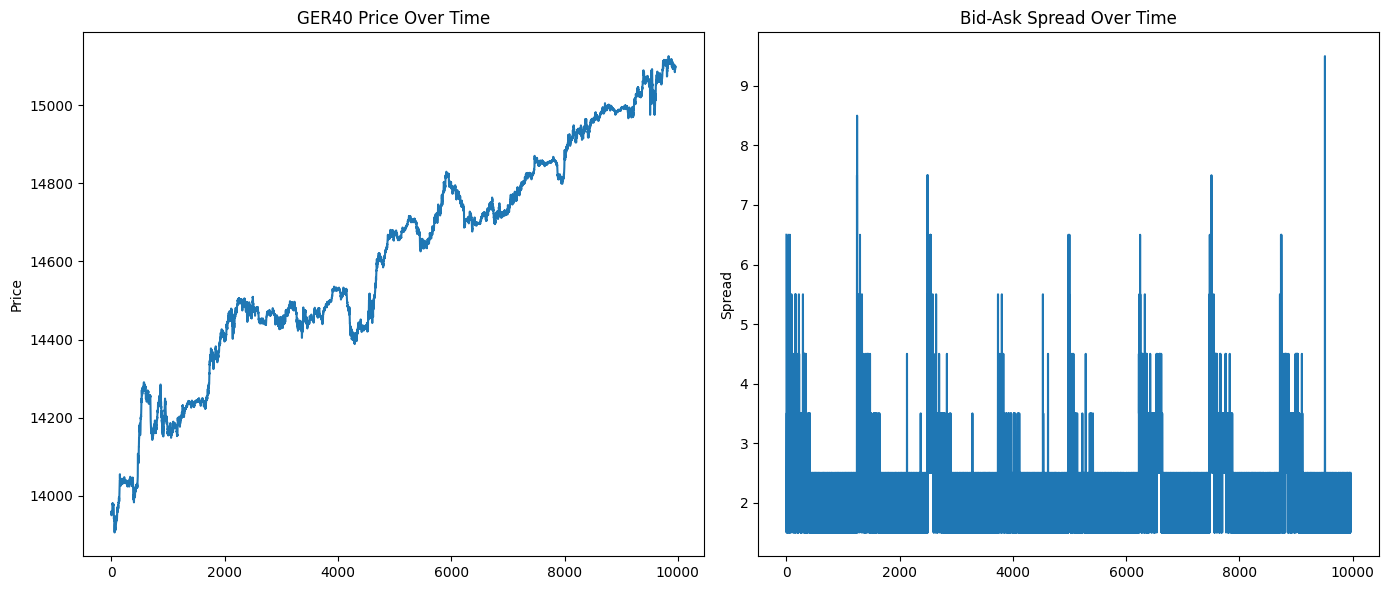

In [23]:
df['mid_price'] = (df['CloseBid'] + df['CloseAsk']) / 2
df['spread'] = df['CloseAsk'] - df['CloseBid']
df['returns'] = df['mid_price'].pct_change()
print("Spread statistics:")
print(df['spread'].describe())
print("\nReturns statistics:")
print(df['returns'].describe())
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
df['mid_price'].plot(title='GER40 Price Over Time')
plt.ylabel('Price')
plt.subplot(1, 2, 2)
df['spread'].plot(title='Bid-Ask Spread Over Time')
plt.ylabel('Spread')
plt.tight_layout()
plt.show()

## Data Completeness Check

In [24]:
start_time = df['Time'].min()
end_time = df['Time'].max()
expected_minutes = int((end_time - start_time).total_seconds() / 60) + 1
actual_records = len(df)
completeness = (actual_records / expected_minutes) * 100
print(f"Expected minutes (if continuous): {expected_minutes:,}")
print(f"Actual records: {actual_records:,}")
print(f"Data completeness: {completeness:.2f}%")
print(f"Missing records: {expected_minutes - actual_records:,}")

Expected minutes (if continuous): 14,205
Actual records: 9,960
Data completeness: 70.12%
Missing records: 4,245


## Column Structure Verification

In [25]:
print("Processed data columns:")
print(df.columns.tolist())
print("\nExpected columns: Date, TOD, OpenBid, OpenAsk, HighBid, HighAsk, LowBid, LowAsk, CloseBid, CloseAsk")
required_cols = ['Date', 'TOD', 'OpenBid', 'OpenAsk', 'HighBid', 'HighAsk', 'LowBid', 'LowAsk', 'CloseBid', 'CloseAsk']
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    print(f"\nWARNING: Missing columns: {missing_cols}")
else:
    print("\nAll required columns present!")

Processed data columns:
['Date', 'TOD', 'OpenBid', 'OpenAsk', 'HighBid', 'HighAsk', 'LowBid', 'LowAsk', 'CloseBid', 'CloseAsk', 'Time', 'time_diff', 'date', 'hour', 'minute', 'day_of_week', 'mid_price', 'spread', 'returns']

Expected columns: Date, TOD, OpenBid, OpenAsk, HighBid, HighAsk, LowBid, LowAsk, CloseBid, CloseAsk

All required columns present!


## Summary Report

In [26]:
print("="*60)
print("GER40 PROCESSED DATA SUMMARY")
print("="*60)
print(f"\nData Period: {df['Time'].min()} to {df['Time'].max()}")
print(f"Total Records: {len(df):,}")
print(f"Data Completeness: {completeness:.2f}%")
print(f"\nTrading Days: {len(daily_counts)}")
print(f"Trading Days by Day of Week:")
trading_days = df.groupby(['date', 'day_of_week']).size().reset_index()[['date', 'day_of_week']]
print(trading_days['day_of_week'].value_counts().reindex(days_order))
print(f"\nTypical Trading Hours:")
if len(daily_schedule['first_time'].mode()) > 0:
    print(f"  Most common open: {daily_schedule['first_time'].mode()[0]}")
if len(daily_schedule['last_time'].mode()) > 0:
    print(f"  Most common close: {daily_schedule['last_time'].mode()[0]}")
print(f"\nPrice Range: {df['CloseBid'].min():.2f} - {df['CloseBid'].max():.2f}")
print(f"Average Spread: {df['spread'].mean():.2f}")
print(f"\nData Quality:")
print(f"  Missing values: {df[required_cols].isnull().sum().sum()}")
print(f"  Time gaps > 1 min: {(df['time_diff'] > timedelta(minutes=1)).sum():,}")
print(f"  Records per day (avg): {daily_counts.mean():.1f}")
print("="*60)

GER40 PROCESSED DATA SUMMARY

Data Period: 2023-01-03 00:15:00 to 2023-01-12 20:59:00
Total Records: 9,960
Data Completeness: 70.12%

Trading Days: 8
Trading Days by Day of Week:
day_of_week
Monday       1.0
Tuesday      2.0
Wednesday    2.0
Thursday     2.0
Friday       1.0
Saturday     NaN
Sunday       NaN
Name: count, dtype: float64

Typical Trading Hours:
  Most common open: 00:15:00
  Most common close: 20:59:00

Price Range: 13905.60 - 15123.75
Average Spread: 2.27

Data Quality:
  Missing values: 0
  Time gaps > 1 min: 7
  Records per day (avg): 1245.0
